In [2]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

train_df.head(), test_df.head()

(                             Student ID   Age Gender   Home Region  Home City  \
 0  4f14c50d-162e-4a15-9cf0-ec129c33bcf0  37.0    ذكر  منطقة الرياض     الرياض   
 1  0599d409-876b-41a5-af05-749ef0e77d32  21.0    ذكر    منطقة عسير  خميس مشيط   
 2  38a11c0e-4afc-4261-9c64-e94cc0a272fb  24.0    ذكر  منطقة الرياض     الرياض   
 3  1693e85b-f80e-40ce-846f-395ddcece6d3  23.0    ذكر  منطقة الرياض     الرياض   
 4  98a0e8d0-5f80-4634-afd8-322aa0902863  23.0    ذكر  منطقة الرياض     الرياض   
 
                              Program ID Program Main Category Code  \
 0  453686d8-4023-4506-b2df-fac8b059ac26                       PCRF   
 1  cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60                       APMR   
 2  e006900d-05a9-4c2b-a36f-0ffb9fce44cd                       APMR   
 3  2ec15f6b-233b-428a-b9f5-e40bc8d14cf9                       TOSL   
 4  d32da0e9-1aed-48c3-992d-a22f9ccc741e                       CAUF   
 
   Program Sub Category Code Technology Type Program Skill Level  ...  \
 0   

In [3]:
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test = test_df.isnull().sum().sort_values(ascending=False)


info_train = train_df.dtypes
info_test = test_df.dtypes

missing_train, info_train

(Still Working                     4567
 Job Type                          4567
 College                           3890
 Technology Type                   2982
 Program Skill Level               1646
 Program Sub Category Code          935
 Employment Status                  566
 Education Speaciality              277
 Age                                 92
 University Degree Score             81
 University Degree Score System      81
 Level of Education                  26
 Home Region                          2
 Home City                            2
 Student ID                           0
 Gender                               0
 Program Main Category Code           0
 Program ID                           0
 Completed Degree                     0
 Program Start Date                   0
 Program Presentation Method          0
 Program Days                         0
 Program End Date                     0
 Y                                    0
 dtype: int64,
 Student ID              

In [4]:
high_missing_cols = ['Still Working', 'Job Type', 'College']
train_df_clean = train_df.drop(columns=high_missing_cols)
test_df_clean = test_df.drop(columns=high_missing_cols)

In [5]:
train_df_clean['Age'] = train_df_clean['Age'].fillna(train_df_clean['Age'].median())
test_df_clean['Age'] = test_df_clean['Age'].fillna(test_df_clean['Age'].median())

In [6]:
train_df_clean['University Degree Score'] = train_df_clean['University Degree Score'].fillna(train_df_clean['University Degree Score'].median())
test_df_clean['University Degree Score'] = test_df_clean['University Degree Score'].fillna(test_df_clean['University Degree Score'].median())

train_df_clean['University Degree Score System'] = train_df_clean['University Degree Score System'].fillna(train_df_clean['University Degree Score System'].median())
test_df_clean['University Degree Score System'] = test_df_clean['University Degree Score System'].fillna(test_df_clean['University Degree Score System'].median())


In [7]:
for col in train_df_clean.select_dtypes(include='object').columns:
    if train_df_clean[col].isnull().sum() > 0:
        train_df_clean[col] = train_df_clean[col].fillna(train_df_clean[col].mode()[0])

for col in test_df_clean.select_dtypes(include='object').columns:
    if test_df_clean[col].isnull().sum() > 0:
        test_df_clean[col] = test_df_clean[col].fillna(test_df_clean[col].mode()[0])

In [8]:
train_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6548 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6548 non-null   object 
 4   Home City                       6548 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       6548 non-null   object 
 8   Technology Type                 6548 non-null   object 
 9   Program Skill Level             6548 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

In [9]:
from sklearn.preprocessing import LabelEncoder

train_encoded = train_df_clean.copy()
test_encoded = test_df_clean.copy()

#encode
label_encoders = {}

for col in train_encoded.select_dtypes(include='object').columns:
    if col != 'Student ID':
        le = LabelEncoder()
        combined_data = pd.concat([train_encoded[col], test_encoded[col]], axis=0)
        le.fit(combined_data)
        train_encoded[col] = le.transform(train_encoded[col])
        test_encoded[col] = le.transform(test_encoded[col])
        label_encoders[col] = le

train_encoded.head(20)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Program Start Date,Program End Date,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,1,4,24,65,6,6,0,2,...,48,56,12,1,0,871,2.44,4.0,3,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,1,10,66,180,1,9,0,2,...,42,46,5,1,0,334,5.00,5.0,1,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,1,4,24,197,1,9,0,2,...,53,68,54,1,0,134,3.50,5.0,4,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,1,4,24,43,9,10,0,2,...,53,65,33,1,0,612,3.55,5.0,0,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,1,4,24,188,2,9,0,2,...,44,58,54,0,0,795,4.00,5.0,4,0
5,6b27cd77-23aa-438b-bd0b-7abdb40a717c,30.0,1,4,24,52,0,4,2,0,...,46,52,12,1,0,867,4.07,5.0,4,0
6,3c34ef05-7a14-4ed2-a50a-910acaa97006,30.0,0,4,24,22,4,4,0,2,...,56,64,5,1,0,798,4.00,5.0,4,0
7,85ec0b08-cf03-47d2-a10e-5e9cccf534c3,23.0,0,0,64,67,0,9,0,0,...,2,2,5,1,0,731,3.64,4.0,0,0
8,fb35317b-1e3e-492b-8ac1-119cb60c567b,27.0,0,11,61,112,1,8,0,2,...,19,19,5,1,0,786,3.00,5.0,4,0
9,621c5334-db96-460e-982c-5f7c385b31b1,20.0,1,12,94,5,6,6,0,0,...,74,86,19,0,0,694,2.00,5.0,5,1


#Decision Tree model

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#features and target
X = train_encoded.drop(columns=["Student ID", "Y"])
y = train_encoded["Y"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, output_dict=True)

accuracy, pd.DataFrame(report).transpose()


(0.9015267175572519,
               precision    recall  f1-score      support
 0              0.941124  0.943649  0.942385  1118.000000
 1              0.666667  0.656250  0.661417   192.000000
 accuracy       0.901527  0.901527  0.901527     0.901527
 macro avg      0.803895  0.799950  0.801901  1310.000000
 weighted avg   0.900898  0.901527  0.901205  1310.000000)

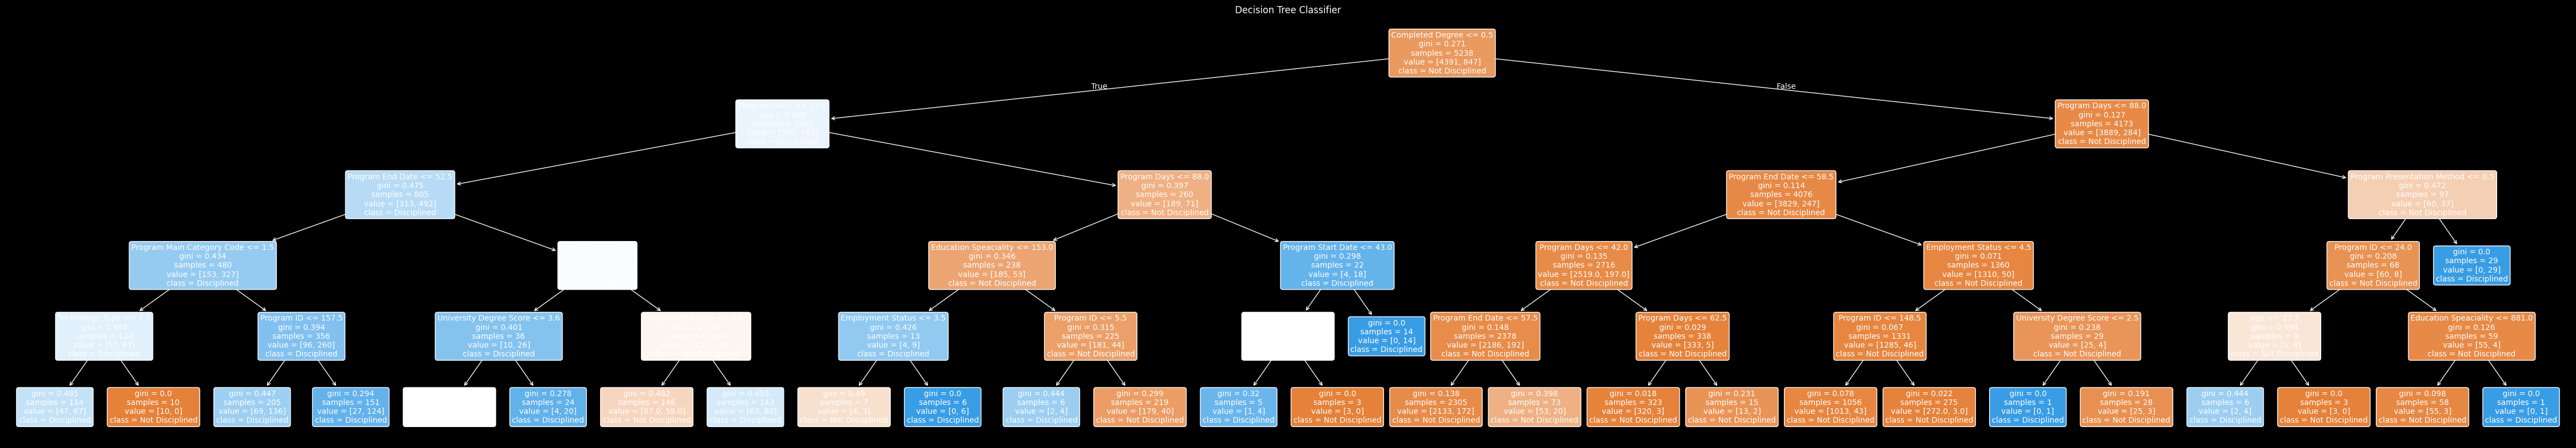

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Disciplined", "Disciplined"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [45]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
logreg = LogisticRegression(max_iter=1000, random_state=42)

##GridSearchCV

In [46]:
param_grids = {
    'Decision Tree': {
        'model': dt,
        'params': {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': rf,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'Gradient Boosting': {
        'model': gb,
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': xgb,
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'Logistic Regression': {
        'model': logreg,
        'params': {
            'C': [0.1, 1, 10]
        }
    }
}

##tuned hyperparameters

In [47]:
rf_best = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
gb_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_best = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', random_state=42)

In [48]:
rf_best.fit(X_train, y_train)
gb_best.fit(X_train, y_train)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [49]:
rf_acc = accuracy_score(y_val, rf_best.predict(X_val))
gb_acc = accuracy_score(y_val, gb_best.predict(X_val))
xgb_acc = accuracy_score(y_val, xgb_best.predict(X_val))

##VotingClassifier

In [50]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('gb', gb_best),
        ('xgb', xgb_best)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
voting_acc = accuracy_score(y_val, voting_clf.predict(X_val))

{
    'Random Forest Accuracy': rf_acc,
    'Gradient Boosting Accuracy': gb_acc,
    'XGBoost Accuracy': xgb_acc,
    'Voting Classifier Accuracy': voting_acc
}

{'Random Forest Accuracy': 0.9061068702290076,
 'Gradient Boosting Accuracy': 0.8977099236641222,
 'XGBoost Accuracy': 0.9015267175572519,
 'Voting Classifier Accuracy': 0.9053435114503817}

##other supervised ML models to test

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [52]:
gnb = GaussianNB()
svc = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
gnb.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
gnb_acc = accuracy_score(y_val, gnb.predict(X_val))
svc_acc = accuracy_score(y_val, svc.predict(X_val))
knn_acc = accuracy_score(y_val, knn.predict(X_val))

{
    'Gaussian Naive Bayes Accuracy': gnb_acc,
    'SVM (RBF Kernel) Accuracy': svc_acc,
    'K-Nearest Neighbors Accuracy': knn_acc
}

{'Gaussian Naive Bayes Accuracy': 0.8122137404580153,
 'SVM (RBF Kernel) Accuracy': 0.8534351145038168,
 'K-Nearest Neighbors Accuracy': 0.8351145038167939}

In [55]:
!pip install lightgbm
!pip install catboost

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

et = ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=0, random_state=42)

et.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

et_acc = accuracy_score(y_val, et.predict(X_val))
lgbm_acc = accuracy_score(y_val, lgbm.predict(X_val))
catboost_acc = accuracy_score(y_val, catboost.predict(X_val))

{
    'Extra Trees Accuracy': et_acc,
    'LightGBM Accuracy': lgbm_acc,
    'CatBoost Accuracy': catboost_acc
}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 847, number of negative: 4391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 5238, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161703 -> initscore=-1.645612
[LightGBM] [Info] Start training from score -1.645612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

{'Extra Trees Accuracy': 0.9022900763358779,
 'LightGBM Accuracy': 0.9022900763358779,
 'CatBoost Accuracy': 0.899236641221374}

##best model: Random Forest

In [57]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
best_model.fit(X, y)

X_test = test_encoded.drop(columns=["Student ID"])

# Predict probabilities
probs = best_model.predict_proba(X_test)[:, 1]

test_results = test_df.copy()
test_results["Predicted_Probability"] = probs

##top 3 most disciplined students based on Random Forest

In [58]:
X = train_encoded.drop(columns=["Student ID", "Y"])
y = train_encoded["Y"]

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=42)

In [59]:
X_test = test_encoded.drop(columns=["Student ID"])
test_df["Predicted_Probability"] = model.predict_proba(X_test)[:, 1]

In [60]:
top_3 = test_df.sort_values(by="Predicted_Probability", ascending=False).head(3)
top_3[["Student ID", "Predicted_Probability"]]

,Student ID,Predicted_Probability
429,ab6257aa-c993-4785-aac5-92f75d07f62e,0.971667
112,0d5e2981-f408-4232-83db-e797ac5440f0,0.948498
211,a71c4ce3-59ef-455d-9e74-f83573253ca1,0.933507


##more readable table

In [61]:
top_3 = test_df.copy()
top_3["Predicted_Probability"] = model.predict_proba(X_test)[:, 1]

cols_to_show = [
    "Student ID", "Gender", "Age", "Home City", "Home Region",
    "University Degree Score", "Level of Education", "Employment Status",
    "Program Days", "Predicted_Probability"
]

top_3_sorted = top_3.sort_values(by="Predicted_Probability", ascending=False).head(3)
top_3_sorted[cols_to_show]


,Student ID,Gender,Age,Home City,Home Region,University Degree Score,Level of Education,Employment Status,Program Days,Predicted_Probability
429,ab6257aa-c993-4785-aac5-92f75d07f62e,أنثى,29.0,حائل,منطقة حائل,2.55,البكالوريوس,موظف,173,0.971667
112,0d5e2981-f408-4232-83db-e797ac5440f0,أنثى,22.0,جدة,منطقة مكة المكرمة,3.71,البكالوريوس,طالب,173,0.948498
211,a71c4ce3-59ef-455d-9e74-f83573253ca1,أنثى,22.0,الطائف,منطقة مكة المكرمة,3.63,البكالوريوس,طالب,173,0.933507


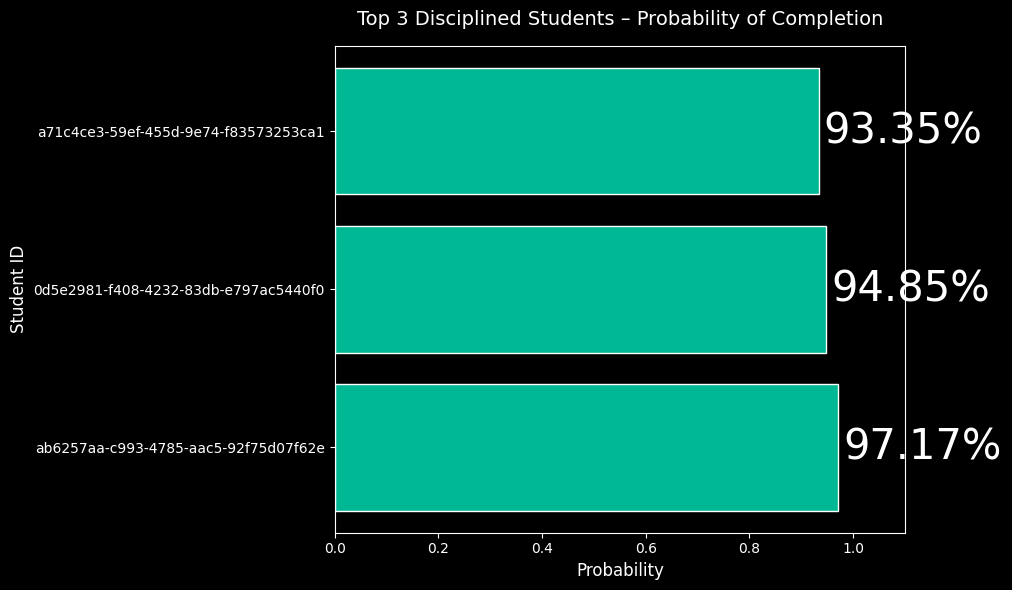

In [62]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(
    y=top_3_sorted["Student ID"],
    width=top_3_sorted["Predicted_Probability"],
    color='#00b894',
    edgecolor='white'
)

for bar in bars:
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f"{bar.get_width():.2%}",
            va='center', ha='left', color='white', fontsize=30)

ax.set_title("Top 3 Disciplined Students – Probability of Completion", fontsize=14, color='white', pad=15)
ax.set_xlabel("Probability", fontsize=12, color='white')
ax.set_ylabel("Student ID", fontsize=12, color='white')
ax.set_xlim(0, 1.1)
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()


##streamlit

In [63]:
!pip install streamlit pyngrok --quiet

In [64]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

st.set_page_config(page_title="Top Disciplined Students", layout="wide")

st.title("Top 3 Disciplined Students – Prediction Dashboard")

train_file = st.file_uploader("Upload train.csv", type="csv")
test_file = st.file_uploader("Upload test.csv", type="csv")

if train_file and test_file:
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    drop_cols = ['Still Working', 'Job Type', 'College']
    train_df.drop(columns=drop_cols, errors='ignore', inplace=True)
    test_df.drop(columns=drop_cols, errors='ignore', inplace=True)

    for col in ['Age', 'University Degree Score', 'University Degree Score System']:
        train_df[col] = train_df[col].fillna(train_df[col].median())
        test_df[col] = test_df[col].fillna(test_df[col].median())

    for df in [train_df, test_df]:
        for col in df.select_dtypes(include='object').columns:
            if col != 'Student ID':
                df[col] = df[col].fillna(df[col].mode()[0])

    train_encoded = train_df.copy()
    test_encoded = test_df.copy()
    for col in train_encoded.select_dtypes(include='object').columns:
        if col != 'Student ID':
            le = LabelEncoder()
            le.fit(pd.concat([train_encoded[col], test_encoded[col]]))
            train_encoded[col] = le.transform(train_encoded[col])
            test_encoded[col] = le.transform(test_encoded[col])

    X = train_encoded.drop(columns=["Student ID", "Y"])
    y = train_encoded["Y"]
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X, y)

    X_test = test_encoded.drop(columns=["Student ID"])
    test_df["Predicted_Probability"] = model.predict_proba(X_test)[:, 1]
    top_3 = test_df.sort_values(by="Predicted_Probability", ascending=False).head(3)

    st.subheader("Top 3 Predicted Students:")
    st.dataframe(top_3[[
        "Student ID", "Gender", "Age", "Home City", "Home Region",
        "University Degree Score", "Level of Education",
        "Employment Status", "Program Days", "Predicted_Probability"
    ]])

    st.subheader("Visual Representation:")
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.barh(
        y=top_3["Student ID"],
        width=top_3["Predicted_Probability"],
        color='#00b894',
        edgecolor='white'
    )
    for bar in bars:
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f"{bar.get_width():.2%}", va='center', ha='left', color='white', fontsize=12)

    ax.set_xlim(0, 1.1)
    ax.set_xlabel("Probability", color='white')
    ax.set_ylabel("Student ID", color='white')
    ax.set_title("Top 3 Disciplined Students – Probability of Completion", color='white')
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    fig.patch.set_facecolor('#0f1117')
    ax.set_facecolor('#0f1117')
    st.pyplot(fig)

2025-05-18 08:02:07.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.028 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.030 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.032 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 08:02:07.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [33]:
!ngrok config add-authtoken 2rQ1EzGNTE7mRgysIbgvoYkNMxs_6BFoX1gUZDrFeefNvgcrD

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
!pip install streamlit pyngrok --quiet

from pyngrok import ngrok, conf

conf.get_default().auth_token = "2rQ1EzGNTE7mRgysIbgvoYkNMxs_6BFoX1gUZDrFeefNvgcrD"


public_url = ngrok.connect(port=8501)
print("Streamlit URL:", public_url)


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
from pyngrok import ngrok

!pkill streamlit

public_url = ngrok.connect(port=8501)
print("Streamlit URL:", public_url)

!streamlit run app.py &>/content/log.txt &

In [ ]:
from pyngrok import ngrok

# ضَع التوكِن الخاص بحسابك
ngrok.set_auth_token("2rQ1EzGNTE7mRgysIbgvoYkNMxs_6BFoX1gUZDrFeefNvgcrD")

# (اختياري) أوقف أي جلسة قديمة
ngrok.kill()               # أو !pkill -f streamlit

# شغّل تطبيق ستريملت في الخلفية
!streamlit run app.py &> /dev/null &   # استبدل app.py بملفك

# افتح النفق الصحيح
public_url = ngrok.connect(8501)       # أو ngrok.connect(8501, "http")
print("Streamlit URL:", public_url)


In [ ]:
# لتثبيت الخط العربي (Amiri مثلاً)
!apt-get install -y fonts-amiri
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Amiri'


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# ✅ تثبيت المكتبات
!pip install streamlit pyngrok --quiet

# ✅ إنشاء ملف app.py (تطبيقك هنا)
%%writefile app.py
import warnings
warnings.filterwarnings("ignore")

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

st.set_page_config(page_title="Top Disciplined Students", layout="wide")

st.title("🎯 Top 3 Disciplined Students – Prediction Dashboard")

train_file = st.file_uploader("📂 Upload train.csv", type="csv")
test_file = st.file_uploader("📂 Upload test.csv", type="csv")

if train_file and test_file:
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    drop_cols = ['Still Working', 'Job Type', 'College']
    train_df.drop(columns=drop_cols, errors='ignore', inplace=True)
    test_df.drop(columns=drop_cols, errors='ignore', inplace=True)

    for col in ['Age', 'University Degree Score', 'University Degree Score System']:
        train_df[col] = train_df[col].fillna(train_df[col].median())
        test_df[col] = test_df[col].fillna(test_df[col].median())

    for df in [train_df, test_df]:
        for col in df.select_dtypes(include='object').columns:
            if col != 'Student ID':
                df[col] = df[col].fillna(df[col].mode()[0])

    train_encoded = train_df.copy()
    test_encoded = test_df.copy()
    for col in train_encoded.select_dtypes(include='object').columns:
        if col != 'Student ID':
            le = LabelEncoder()
            le.fit(pd.concat([train_encoded[col], test_encoded[col]]))
            train_encoded[col] = le.transform(train_encoded[col])
            test_encoded[col] = le.transform(test_encoded[col])

    X = train_encoded.drop(columns=["Student ID", "Y"])
    y = train_encoded["Y"]
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X, y)

    X_test = test_encoded.drop(columns=["Student ID"])
    test_df["Predicted_Probability"] = model.predict_proba(X_test)[:, 1]
    top_3 = test_df.sort_values(by="Predicted_Probability", ascending=False).head(3)

    st.subheader("🏅 Top 3 Predicted Students:")
    st.dataframe(top_3[[
        "Student ID", "Gender", "Age", "Home City", "Home Region",
        "University Degree Score", "Level of Education",
        "Employment Status", "Program Days", "Predicted_Probability"
    ]].style.format({"Predicted_Probability": "{:.2%}"}))

    st.subheader("📊 Visual Representation:")
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.barh(
        y=top_3["Student ID"],
        width=top_3["Predicted_Probability"],
        color='#00b894',
        edgecolor='white'
    )
    for bar in bars:
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f"{bar.get_width():.2%}", va='center', ha='left', color='white', fontsize=12)

    ax.set_xlim(0, 1.1)
    ax.set_xlabel("احتمالية الاستمرارية", color='white')
    ax.set_ylabel("الرقم التعريفي للمتدرب", color='white')
    ax.set_title("👤 أكثر المتدربين التزامًا بالبرامج التدريبية", color='white')
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    fig.patch.set_facecolor('#0f1117')
    ax.set_facecolor('#0f1117')
    st.pyplot(fig)

else:
    st.info("📌 يرجى رفع ملفي train.csv و test.csv لبدء التنبؤ وتحليل البيانات.")


In [41]:
!pkill -f streamlit || true        # اغلق أي عملية قديمة
from pyngrok import ngrok
ngrok.kill()                       # يغلق أنفاقاً قديمة إن وجدت

!streamlit run app.py --server.headless true --server.port 8501 &> /dev/null &

ngrok.set_auth_token("2rQ1EzGNTE7mRgysIbgvoYkNMxs_6BFoX1gUZDrFeefNvgcrD")
public_url = ngrok.connect(8501)
print("Streamlit URL ➜", public_url)


^C
Streamlit URL ➜ NgrokTunnel: "https://faef-34-125-12-238.ngrok-free.app" -> "http://localhost:8501"


In [38]:
# 1) أوقف أي جلسات قديمة (اختياري لكن يزيل التعارضات)
!pkill -f streamlit  || true          # يتجاهل الخطأ إن لم يوجد شيء
from pyngrok import ngrok
ngrok.kill()                          # يغلق أنفاقاً قديمة إن وُجدت

# 2) شغّل Streamlit في الخلفية واحرص على ضبط المنفذ 8501
import subprocess, time, os, signal

process = subprocess.Popen(
    ["streamlit", "run", "app.py",   # <-- عدّل إلى اسم ملفك
     "--server.port", "8501",
     "--server.headless", "true"],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True
)

# انتظر حتى يظهر سطر "Running on http://localhost:8501"
while True:
    line = process.stdout.readline()
    if not line:
        break
    print(line.strip())
    if "Running on" in line and "8501" in line:
        break

# 3) بعد تأكّد التشغيل، افتح النفق
ngrok.set_auth_token("2rQ1EzGNTE7mRgysIbgvoYkNMxs_6BFoX1gUZDrFeefNvgcrD")
public_url = ngrok.connect(8501)      # أو ngrok.connect("http://localhost:8501")
print("Streamlit URL ➜", public_url)


^C



You can now view your Streamlit app in your browser.

Local URL: http://localhost:8501
Network URL: http://172.28.0.12:8501
External URL: http://34.125.12.238:8501



KeyboardInterrupt: 